Dump out some info for Dave to check correlation values

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
outDir ='out'
dbFile = 'minion_1016_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
# The pass metric just passes data straight through.
metric = metrics.PassMetric(cols=['filter','fiveSigmaDepth','expMJD', 'HA', 
                                  'ra_pi_amp', 'dec_pi_amp'])
slicer = slicers.HealpixSlicer(nside=16)
sql = 'fieldID = 1600 and filter != "u" and filter != "y"'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bundle2 = metricBundles.MetricBundle(metrics.ParallaxHADegenMetric(),slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle, 1:bundle2}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with constraint fieldID = 1600 and filter != "u" and filter != "y"
Found 667 visits
Running:  [0, 1]
Completed metric generation.

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:479: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldID = 1600 and filter != "u" and filter != "y" sqlconstraint now.
monopole: 0  dipole: lon: -63.4349, lat: 60.7941, amp: 1.14564
Plotting complete.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:350: UserWarning: Only one metric value, making a guess at a good histogram range.
  warnings.warn('Only one metric value, making a guess at a good histogram range.')


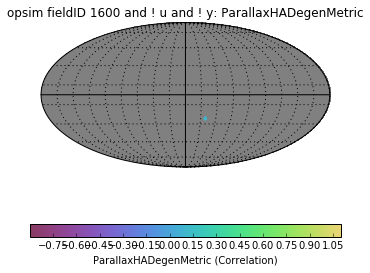

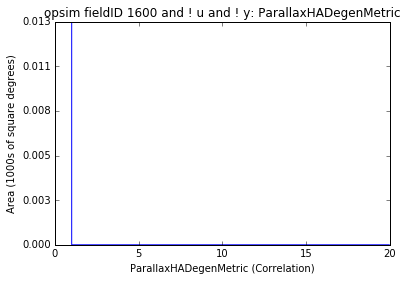

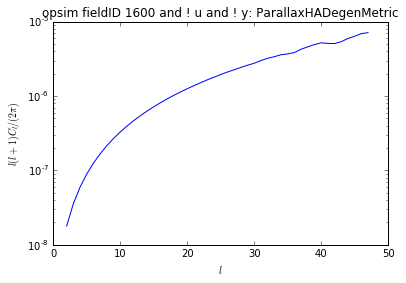

In [4]:
bg.runAll()
bg.plotAll(closefigs=False)

In [5]:
good = np.where(~bundle.metricValues.mask)[0]
print 'Correlation between parallax offset and Hour Angle = %f' % np.max(bundle2.metricValues.data[good])

Correlation between parallax offset and Hour Angle = 0.101767


In [6]:
good = np.where(~bundle.metricValues.mask)[0]

In [7]:
import pandas as pd
df = pd.DataFrame(data=bundle.metricValues.data[good][0])
pd.set_option('display.max_rows', len(df))
print df

     obsHistID   fieldRA  fieldDec  fiveSigmaDepth filter       lst  \
0       126693  5.826338 -0.406673       23.146451      i  5.150698   
1       126718  5.826338 -0.406673       23.164915      i  5.225096   
2       127804  5.826338 -0.406673       24.269255      g  5.307835   
3       127852  5.826338 -0.406673       24.462909      g  5.451191   
4       136815  5.826338 -0.406673       22.882437      z  5.131596   
5       136856  5.826338 -0.406673       23.065996      z  5.251654   
6       138965  5.826338 -0.406673       22.440228      z  5.282399   
7       138999  5.826338 -0.406673       22.409566      z  5.383126   
8       148896  5.826338 -0.406673       21.851915      z  0.447255   
9       151503  5.826338 -0.406673       23.937967      r  5.277451   
10      151552  5.826338 -0.406673       24.040443      r  5.421996   
11      172210  5.826338 -0.406673       24.683811      g  5.081887   
12      172408  5.826338 -0.406673       24.309344      r  5.757286   
13    